In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
data = pd.read_csv("books_data.csv")
print(data.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating  
0  J.K. Rowling/Mary GrandPré           4.57  
1  J.K. Rowling/Mary GrandPré           4.49  
2                J.K. Rowling           4.42  
3  J.K. Rowling/Mary GrandPré           4.56  
4  J.K. Rowling/Mary GrandPré           4.78  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


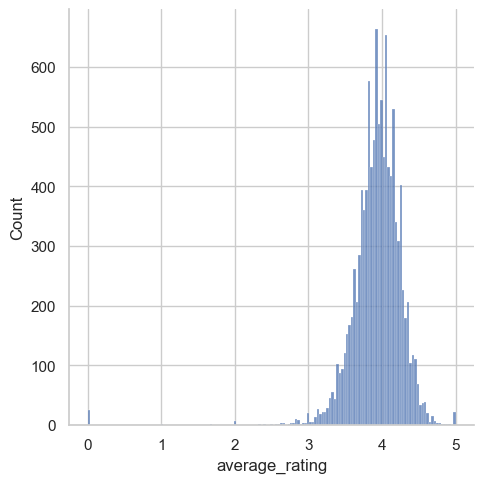

In [38]:
sns.displot(x='average_rating', data=data, kind='hist',stat='count')
plt.show()

In [31]:
sns.displot(x='average_rating', data=data, kind='hist',stat='count')
plt.show()


fig = px.histogram(data, x='average_rating', 
                   nbins=30, 
                   title='Distribution of Average Ratings')
fig.update_xaxes(title_text='Average Rating')
fig.update_yaxes(title_text='Frequency')
fig.show()

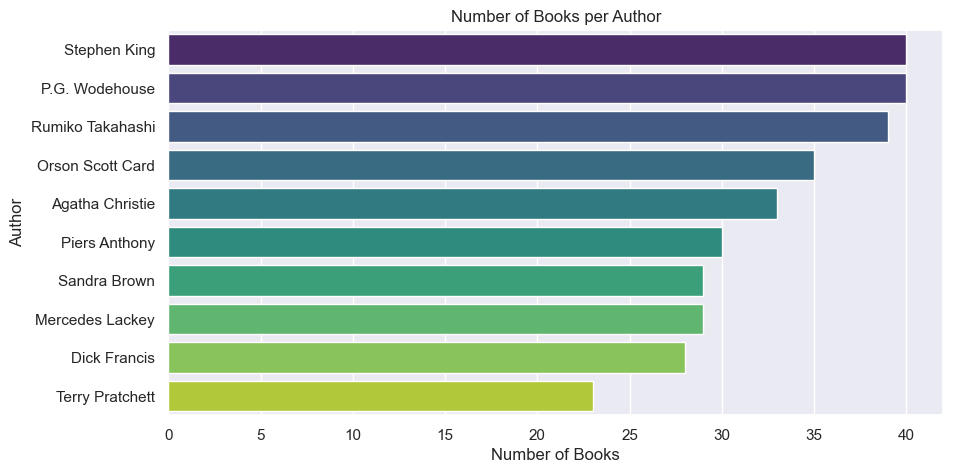

In [43]:
top_authors = data['authors'].value_counts().head(10)

plt.figure(figsize=(10, 5))
#sns.barplot(x=top_authors.values, y=top_authors.index, orient='h', palette='viridis')
sns.barplot(x=top_authors.values, y=top_authors.index, hue=top_authors.index, palette='viridis', dodge=False, legend=False)

plt.title('Number of Books per Author')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


In [10]:
# Convert 'average_rating' to a numeric data type
data['average_rating'] = pd.to_numeric(data['average_rating'], 
                                       errors='coerce')

In [11]:
# Create a new column 'book_content' by combining 'title' and 'authors'
data['book_content'] = data['title'] + ' ' + data['authors']

In [44]:
#transform the text-based features into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['book_content'])

In [13]:
# Compute the cosine similarity between books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = data[data['title'] == book_title].index[0]

    # Get the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books (excluding the input book)
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended books
    return data['title'].iloc[book_indices]

In [15]:
book_title = "Dubliners: Text  Criticism  and Notes"
recommended_books = recommend_books(book_title)
print(recommended_books)

6191      CliffsNotes on Joyce's Dubliners (Cliffs Notes)
2988                                            Dubliners
2987                             The Portable James Joyce
3981                      White Noise: Text and Criticism
7704               The Quiet American: Text and Criticism
2871                          Sam Walton: Made In America
6188                                            Dubliners
2788                                    Dumpy's Valentine
796     Great Expectations: Authoritative Text  Backgr...
8199    Middlemarch: An Authoritative Text  Background...
Name: title, dtype: object
